## Import relevant packages

In [1]:
# Import relevant packages 
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

2024-03-17 11:33:24.119582: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 11:33:24.119709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 11:33:24.267215: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the data

In [6]:
data = pd.read_csv('/kaggle/input/spaceship-titanic-eik-lab/train.csv')
print("Full train dataset shape is {}".format(data.shape))

Full train dataset shape is (8693, 14)


## Explore the data

In [7]:
data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='Transported'>

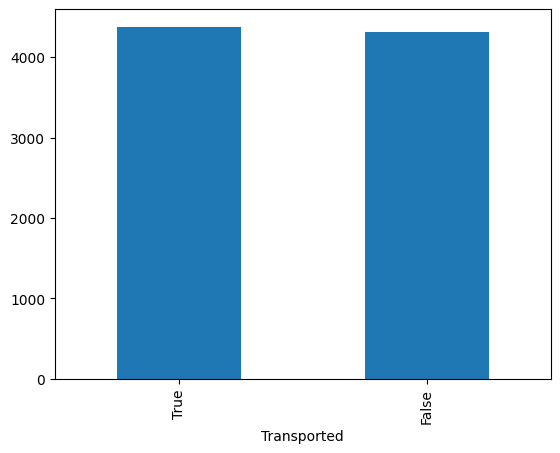

In [10]:
plot_df = data.Transported.value_counts()
plot_df.plot(kind="bar")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

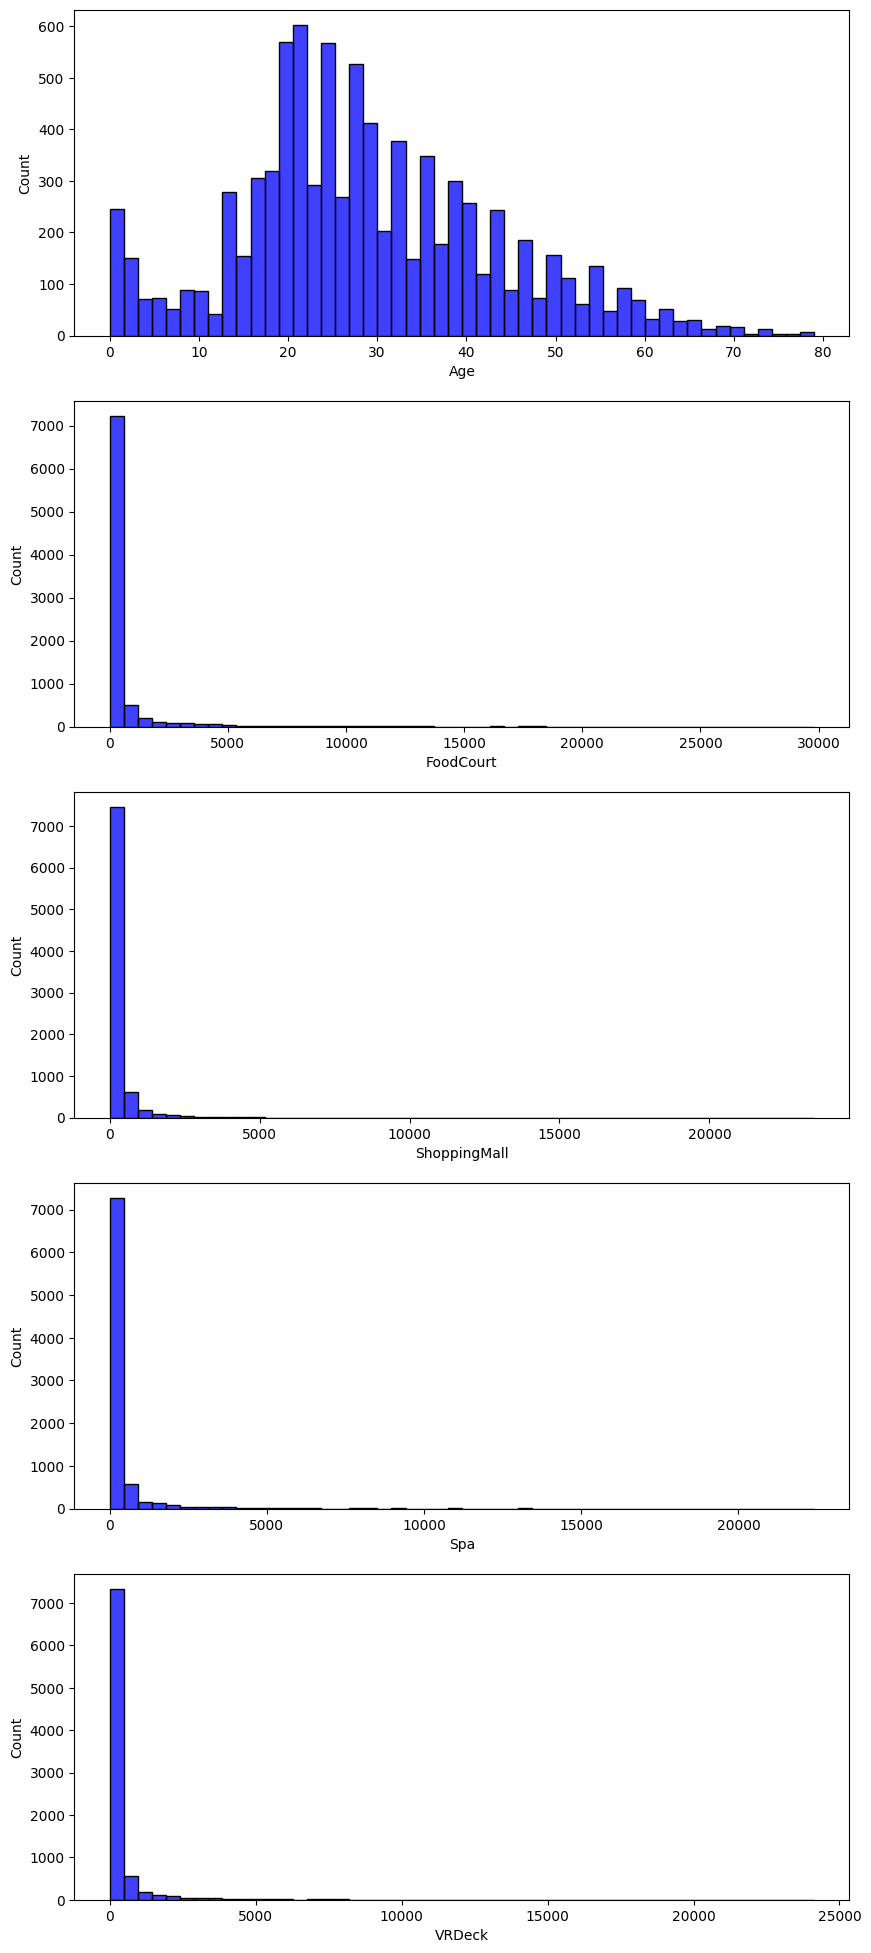

In [11]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(data['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(data['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(data['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(data['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(data['VRDeck'], color='b', bins=50, ax=ax[4]);

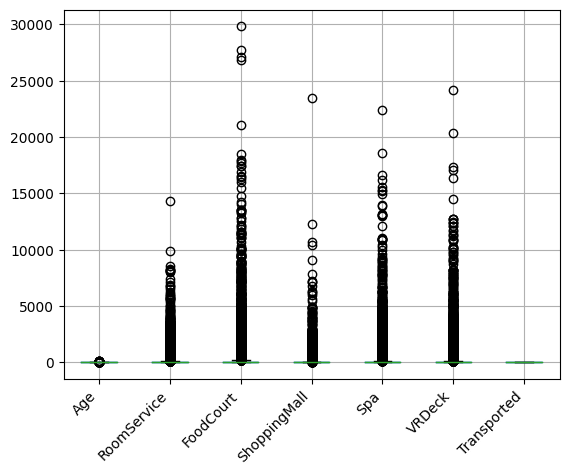

In [13]:
data.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

## Clean the dataset

In [15]:
# separates the target from the data 
y = data.Transported
data=data.iloc[:,0:13]

AttributeError: 'DataFrame' object has no attribute 'Transported'

In [17]:
# PassengerID and Name are not necessary for training
data = data.drop(['PassengerId', 'Name'], axis=1)
data.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [18]:
# Split cabin into three separates variables 
data[["Deck", "Cabin_num", "Side"]] = data["Cabin"].str.split("/", expand=True)
data = data.drop('Cabin', axis=1)

In [19]:
# changing the categorical data to numerical values 

class_labels = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num', 'Side']

for cl in class_labels:
    class_le = LabelEncoder()
    Y_le = class_le.fit_transform(data[cl].values)
    data[cl] = Y_le

y = LabelEncoder().fit_transform(y.values)

In [20]:
# Check for NaN values
print('Column number of missing values')
for c in data.columns:
    n_NaN = data[c].isnull().sum()
    print(f'{c:32} {n_NaN}')

Column number of missing values
HomePlanet                       0
CryoSleep                        0
Destination                      0
Age                              179
VIP                              0
RoomService                      181
FoodCourt                        183
ShoppingMall                     208
Spa                              183
VRDeck                           188
Deck                             0
Cabin_num                        0
Side                             0


In [21]:
# There NaN values in several of the categories which needs to be removed

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(data.values)
imputed_data = imr.transform(data.values)

data = pd.DataFrame(imputed_data, columns=data.columns)


In [22]:
data.shape

(8693, 13)

In [23]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))

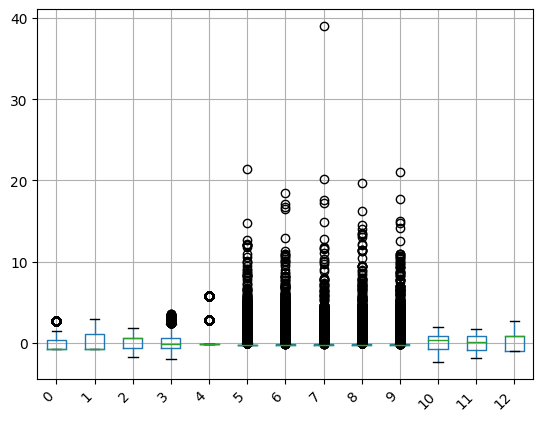

In [24]:
data_scaled.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

## Prepare the dataset for training

In [25]:
# Split the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=6, stratify=y)

In [26]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
3140,1.483520,1.115916,0.577024,0.709437,-0.208465,-0.340590,-0.287314,-0.290817,-0.276663,-1.003243e-16,0.331095,0.884850,0.849738
3149,0.325245,1.115916,0.577024,-0.406461,-0.208465,-0.340590,-0.287314,-0.290817,-0.276663,-2.690226e-01,-1.839907,-1.744639,-0.993729
2275,-0.833031,-0.741736,-1.803647,0.988411,-0.208465,-0.331495,-0.139291,-0.285795,0.121696,-2.213697e-01,0.331095,0.591822,-0.993729
2934,-0.833031,-0.741736,0.577024,-0.755179,-0.208465,-0.340590,-0.287314,0.879286,-0.276663,-2.690226e-01,0.331095,0.795584,0.849738
1750,-0.833031,-0.741736,-1.803647,2.034566,-0.208465,-0.319368,-0.287314,1.518742,-0.276663,-2.690226e-01,0.331095,0.298795,-0.993729


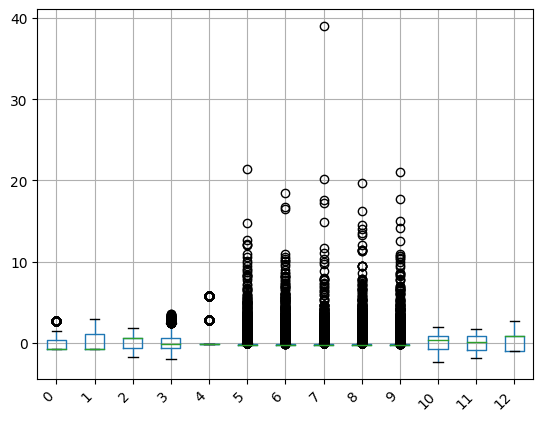

In [27]:
X_train.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

## Train the model

#### List of classifiers 
* Perceptron
* Adaline 
* Logistic Regression
* Support vector machine
* K-nearest Neighbour 
* Decision trees
* Random forest 
* Naive Bayes 
* Gradient Boosting 

In [28]:
# Start the classifier
classifier = SVC()

In [29]:
# Train the classifier
classifier.fit(X_train, y_train)

SVC()

In [30]:
# Predict on the test set and calculate the accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('SVM accuracy: ', accuracy)

SVM accuracy:  0.7952453987730062


## Load the test dataset

In [33]:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic-eik-lab/test.csv')

submission_id = test_data.PassengerId

# Remove Name and passengerID
test_data = test_data.drop(['PassengerId', 'Name'], axis=1)

# Split cabin into three variables 
test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data = test_data.drop('Cabin', axis=1)

# Change the categorical values to numerical values
class_labels = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num', 'Side']

for cl in class_labels:
    class_le = LabelEncoder()
    Y_le = class_le.fit_transform(test_data[cl].values)
    test_data[cl] = Y_le

# replace Nan values
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(test_data.values)
imputed_data = imr.transform(test_data.values)

test_data = pd.DataFrame(imputed_data, columns=test_data.columns)

# Scale the test data
scaler = StandardScaler()
test_data = pd.DataFrame(scaler.fit_transform(test_data))


In [34]:
# Make predictions for the test dataset
submission = SVC()
submission.fit(data_scaled, y)
predictions = submission.predict(test_data)
bool_predictions = (predictions > 0.5).astype(bool)

output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': bool_predictions})

output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [41]:
sample_submission_df = pd.read_csv('/kaggle/input/spaceship-titanic-eik-lab/sample_submission.csv')
sample_submission_df['Transported'] = bool_predictions
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
